In [29]:
import pandas as pd
import glob
from tensorboard.backend.event_processing import event_accumulator
import os
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
def get_best_downstream_loss(tb_dir):
    ea = event_accumulator.EventAccumulator(tb_dir)
    ea.Reload()
    try:  
        loss = ea.Scalars('best_downstream_loss__gen_9')
        return loss
    except:
        return None

In [30]:
best_chromos = pd.read_csv("/home/noah/ESSL/exps/Analysis/Final Results/best_chromos/best_chromos.csv")
glob.glob(best_chromos['dir'].iloc[0]+"/tensorboard")

['/home/noah/ESSL/cc_experiments/es_figs7/models_figs8/opt/exp10_0/5/tensorboard']

In [31]:
all_losses = []
convert = {
    "exp6":"Cifar10, BS=32",
    "exp8":"Cifar10, BS=256",
    "exp11":"SVHN, BS=32",
    "exp10":"SVHN, BS=256",
}
for _, r in best_chromos.iterrows():
    
    for tb in glob.glob(os.path.join(r['dir'], "tensorboard", "*")):
        # there are some unused tb files, skip over these #
        try:
            losses = [t.value for t in get_best_downstream_loss(tb)]
            for epoch, l in enumerate(losses): 
                all_losses.append([convert[r['exp'].split("_")[0]], r['algo'],epoch,  l])
        except:
            continue
df = pd.DataFrame(all_losses, columns = ['exp', 'algo', 'epoch', 'loss'])

df

,exp,algo,epoch,loss
0,"SVHN, BS=256",SwaV,0,1.029532
1,"SVHN, BS=256",SwaV,1,0.456852
2,"SVHN, BS=256",SwaV,2,0.393518
3,"SVHN, BS=256",SwaV,3,0.366751
4,"SVHN, BS=256",SwaV,4,0.350257
...,...,...,...,...
155,"Cifar10, BS=256",NNCLR,5,0.628308
156,"Cifar10, BS=256",NNCLR,6,0.597337
157,"Cifar10, BS=256",NNCLR,7,0.570091
158,"Cifar10, BS=256",NNCLR,8,0.542914


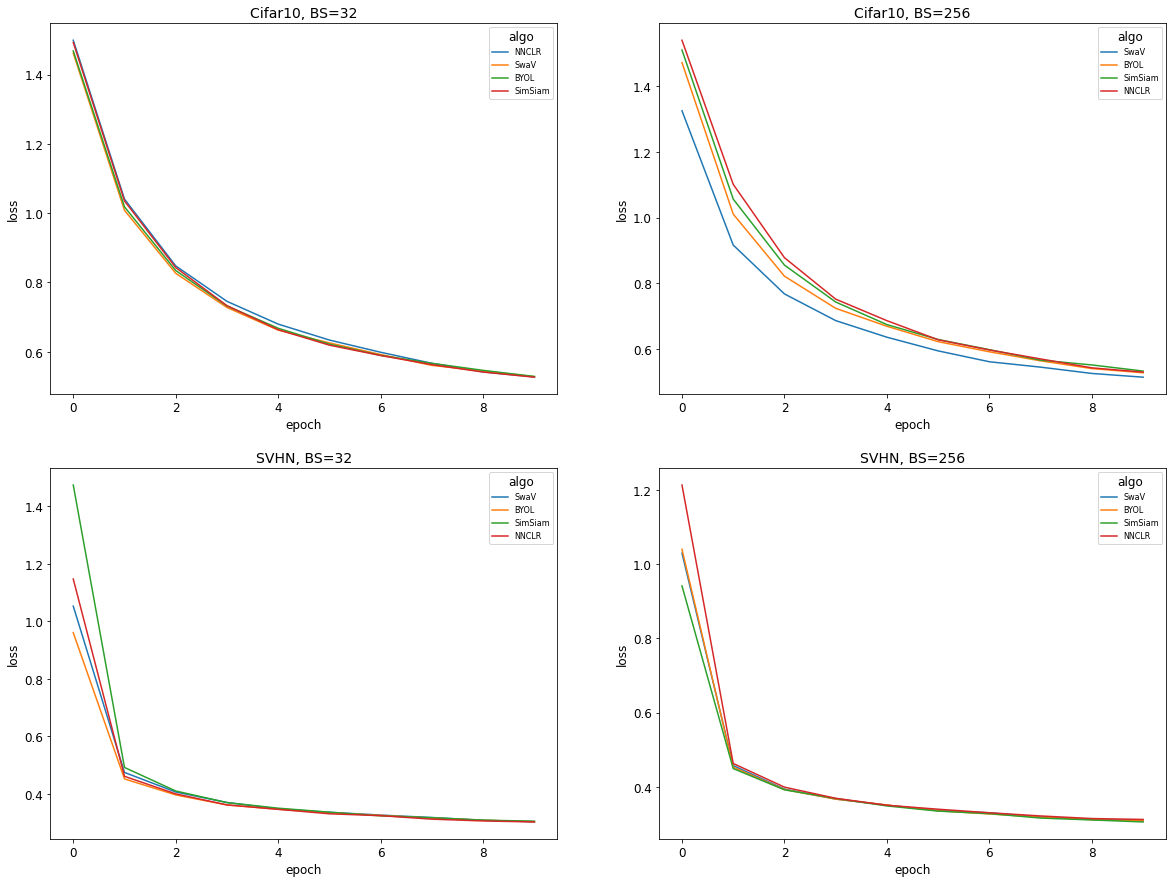

In [37]:
fig, ax = plt.subplots(2,2, figsize=(20, 15))

SMALL_SIZE = 8
MEDIUM_SIZE = 12
BIGGER_SIZE = 14

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

sns.lineplot(df[df['exp'] == "Cifar10, BS=32"], x="epoch", y="loss", hue="algo", ax=ax[0,0])
ax[0,0].set_title("Cifar10, BS=32")
sns.lineplot(df[df['exp'] == "Cifar10, BS=256"], x="epoch", y="loss", hue="algo", ax=ax[0,1])
ax[0,1].set_title("Cifar10, BS=256")
sns.lineplot(df[df['exp'] == "SVHN, BS=32"], x="epoch", y="loss", hue="algo", ax=ax[1,0])
ax[1,0].set_title("SVHN, BS=32")
sns.lineplot(df[df['exp'] == "SVHN, BS=256"], x="epoch", y="loss", hue="algo", ax=ax[1,1])
ax[1,1].set_title("SVHN, BS=256")
plt.show()
plt.clf()

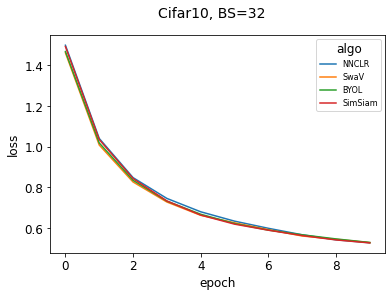

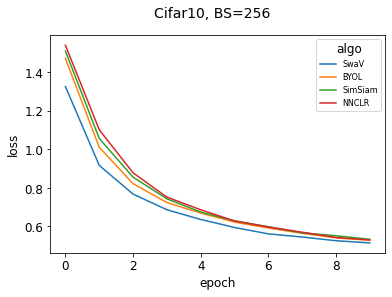

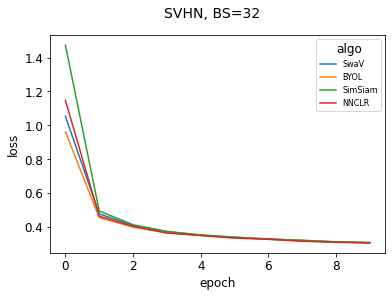

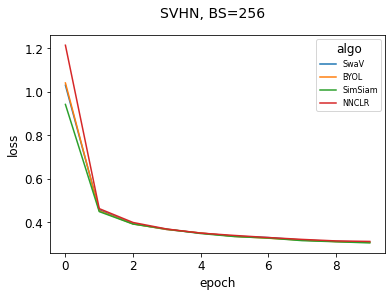

<Figure size 432x288 with 0 Axes>

In [44]:
s = "Cifar10, BS=32"
save_dir = "/home/noah/ESSL/exps/Analysis/Final Results/loss_curves"
sns.lineplot(df[df['exp'] == s], x="epoch", y="loss", hue="algo")
plt.savefig(os.path.join(save_dir, "_".join(s.split(", "))+".png"))
plt.suptitle(s)
plt.show()
plt.clf()
s = "Cifar10, BS=256"
sns.lineplot(df[df['exp'] == s], x="epoch", y="loss", hue="algo")
plt.savefig(os.path.join(save_dir, "_".join(s.split(", "))+".png"))
plt.suptitle(s)
plt.show()
plt.clf()
s = "SVHN, BS=32"
sns.lineplot(df[df['exp'] == s], x="epoch", y="loss", hue="algo")
plt.savefig(os.path.join(save_dir, "_".join(s.split(", "))+".png"))
plt.suptitle(s)
plt.show()
plt.clf()
s = "SVHN, BS=256"
sns.lineplot(df[df['exp'] == s], x="epoch", y="loss", hue="algo")
plt.savefig(os.path.join(save_dir, "_".join(s.split(", "))+".png"))
plt.suptitle(s)
plt.show()
plt.clf()